<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2264/NGC_2264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 2.9MB/s 
     |████████████████████████████████| 2.7MB 32.7MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=f86b7ae7f747d8672af60794488a0553f84ccc4ab68a51a811def434c73bd173
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC2264 center

coordinate = coord.SkyCoord.from_name('NGC2264')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (100.2943, 9.8922)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 3326740453254116864',3326740453254116864,259779195,2015.5,100.297726,0.198972,9.894043,0.200222,0.773356,0.226083,3.420670,-1.576229,0.373456,-1.836557,0.339201,-0.338920,0.142497,-0.240496,0.369222,-0.422035,0.203581,-0.421140,0.252911,0.143749,-0.255410,169,0,169,0,8.837250,380.589905,1.088071,9.630992,31,False,0.424402,1.140887,0.047020,-0.122729,...,2118.893717,17.457883,121.371742,16.446648,1.979951,1,3.202810,1.628382,1.574429,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.961827,2.244435,100.420106,-13.173524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.003842
1,1635721458409799680,b'Gaia DR2 3326740448959150080',3326740448959150080,143553752,2015.5,100.295219,0.105722,9.888383,0.110612,0.880038,0.128105,6.869649,-1.829032,0.201387,-4.454007,0.184396,-0.293391,0.100872,-0.258810,0.332111,-0.478130,0.129420,-0.433582,0.292435,0.187502,-0.235600,160,0,159,1,4.942362,257.102509,0.491260,5.032513,31,False,1.568391,1.184189,0.025688,-0.094452,...,3929.483310,10.651969,368.897369,15.776081,1.666614,0,3.022154,1.650896,1.371258,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.965739,2.239655,100.418001,-13.179350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.003916
2,1635721458409799680,b'Gaia DR2 3326740453253731712',3326740453253731712,420142258,2015.5,100.288983,1.492078,9.897049,1.092886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.300323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,0,68,0,-0.395772,58.027672,0.000000,0.000000,3,False,0.031856,1.723187,0.244792,-0.027822,...,231.350167,17.132916,13.503257,18.851246,2.734862,0,1.892878,0.159828,1.733049,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.955215,2.238144,100.411058,-13.171154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.007147
3,1635721458409799680,b'Gaia DR2 3326740006577519360',3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,870721.416809,800.642651,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.968913,2.235852,100.416360,-13.184037,100001.0,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008433
4,163572

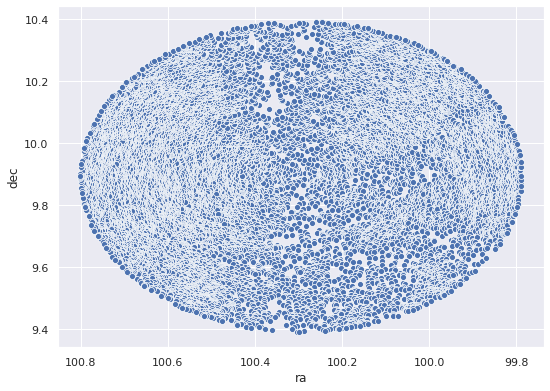

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [7]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [8]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [11]:
## saving only NGC 2264 data from Cantat

cantat_2264 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2264")
cantat_2264 = cantat_2264[0].to_pandas()
cantat_2264

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,100.288919,9.935567,3326741415326788480,1.3254,-1.851,-4.220,NaN,16.416100,3.1947,1.0,b'NGC_2264',100.288927,9.935585
1,100.268700,9.870169,3326739933563070720,1.3051,-0.975,-4.047,NaN,17.872499,2.0718,0.7,b'NGC_2264',100.268704,9.870186
2,100.321455,9.894364,3326740418894376704,1.2577,-1.297,-3.914,NaN,17.051701,2.4179,0.8,b'NGC_2264',100.321461,9.894381
3,100.293254,9.883825,3326740006577519360,1.1663,-1.773,-4.213,NaN,9.904700,-0.0007,0.8,b'NGC_2264',100.293262,9.883843
4,100.229922,9.847141,3326716397142282240,1.2713,-1.759,-2.658,NaN,15.305900,1.7208,0.1,b'NGC_2264',100.229930,9.847153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,100.139414,9.950729,3326929839837216640,1.1883,-1.923,-4.212,NaN,17.801300,2.6959,0.7,b'NGC_2264',100.139422,9.950747
182,100.240944,9.941617,3326929225657356288,1.3572,-1.452,-3.866,NaN,13.435300,1.1690,1.0,b'NGC_2264',100.240950,9.941634
183,100.190391,9.995125,3326930393888460288,1.5371,-1.218,-4.083,NaN,17.504801,2.3604,0.7,b'NGC_2264',100.190396,9.995143
184,100.223620,9.966662,3326929500535262464,1.4464,-1.454,-3.649,NaN,16.329500,2.0670,1.0,b'NGC_2264',100.223627,9.966677


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_2264 = cantat_2264.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_2264 = cantat_2264.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_2264 = all_stars.join(cantat_2264.set_index('source_id'), on='source_id')

In [15]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2264 = cantat_2264.dropna(subset=['PMemb'])
cantat_2264

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
3,1635721458409799680,b'Gaia DR2 3326740006577519360',3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,800.642651,1087.528198,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.968913,2.235852,100.416360,-13.184037,100001.0,9670.666992,9200.250000,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008433,0.8
5,1635721458409799680,b'Gaia DR2 3326740075296996608',3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,-0.147385,...,116.444977,49.115921,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966781,2.231493,100.411398,-13.184484,100001.0,3608.004883,3417.000000,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010309,1.0
6,1635721458409799680,b'Gaia DR2 3326740002281694592',3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,-0.156618,...,1069.139316,662.410767,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.972026,2.238207,100.420088,-13.185468,100002.0,8748.333008,7420.000000,9705.000000,0.0870,0.0379,0.2241,0.0435,0.0146,0.1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010362,1.0
7,1635721458409799680,b'Gaia DR2 3326740075296996736',3326740075296996736,289548265,2015.5,100.286887,0.092189,9.883634,0.082626,1.443122,0.093037,15.511223,-1.464500,0.173904,-3.853637,0.155394,-0.247701,0.274339,-0.372806,0.185210,-0.295910,0.125538,-0.424320,0.115379,0.086176,-0.158110,161,0,161,0,2.295916,199.383438,0.270272,1.541566,31,False,2.265055,1.282532,0.021110,-0.098726,...,377.033814,8.745747,15.966477,1.635123,0,2.294858,1.039610,1.255248,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966218,2.23018

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2264.to_csv('NGC_2264_cantat.csv')
# all_stars.to_csv('NGC_2264_Gaia_30m.csv')

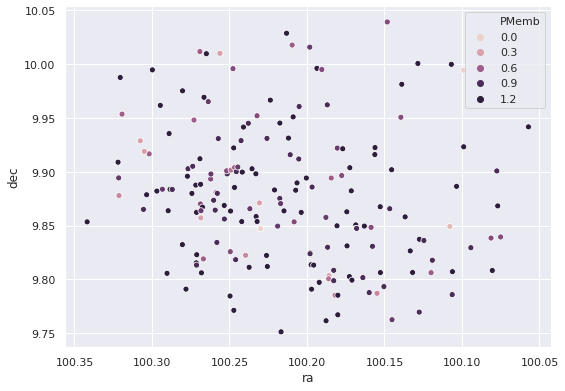

In [17]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2264['ra'], cantat_2264['dec'], hue = cantat_2264['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_2264

In [19]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,181.000000,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708801,0.212232,4.696803,31.0,28.146078,1.399801,0.018506,-0.034812,17.408602,10.634409,...,16.386187,15.182796,1.233644e+05,344.702351,186.840729,14.525523,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.856934,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408721,1.217725,1.548704,1.195101,1.119065,1.271138,0.104799,0.862366
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135644,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,2.409868,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615601,1237.765991,1462.936523,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.057036,0.208165
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.4971

In [20]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

rv_template_teff          -0.381246
pmdec_error               -0.376557
astrometric_sigma5d_max   -0.373716
pmra_error                -0.366275
ra_error                  -0.363609
                             ...   
phot_rp_n_obs              0.153700
parallax_over_error        0.275752
rv_template_logg           0.381246
radial_velocity_error      0.990325
PMemb                      1.000000
Name: PMemb, Length: 88, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_2264_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_2264_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [23]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_2264_center
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,100.213287,9.877636,0.071799,0.071049,1.352903,0.081154,21.877621,-1.701177,0.139875,-3.745869,0.123793,15.526463,1.860670,0.105852
std,0.061108,0.063623,0.039569,0.039205,0.098011,0.044676,10.967634,0.425166,0.076069,0.300932,0.066517,2.112516,0.683421,0.057658
min,100.057098,9.751314,0.023724,0.022577,1.092609,0.026016,6.027352,-3.213657,0.045983,-5.199818,0.041781,8.111469,-0.198882,0.008440
25%,100.172607,9.826504,0.039457,0.039054,1.298197,0.045546,12.966052,-1.855648,0.077942,-3.913778,0.069943,14.998798,1.635192,0.059922
50%,100.217506,9.871068,0.061813,0.059222,1.352404,0.066472,19.991558,-1.623114,0.119541,-3.737772,0.105352,15.958431,1.936859,0.097817
75%,100.261948,9.915905,0.093635,0.096390,1.412481,0.110852,29.224421,-1.459141,0.183187,-3.584583,0.162539,16.953516,2.313512,0.146256
max,100.341797,10.039320,0.190055,0.197718,1.613808,0.205766,53.743515,-0.620285,0.356253,-2.657968,0.311450,17.988478,3.194711,0.242337


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

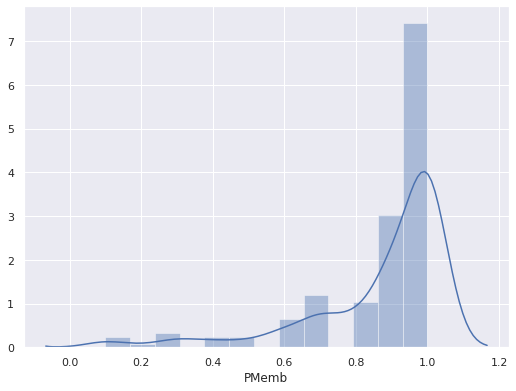

In [25]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [26]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

170

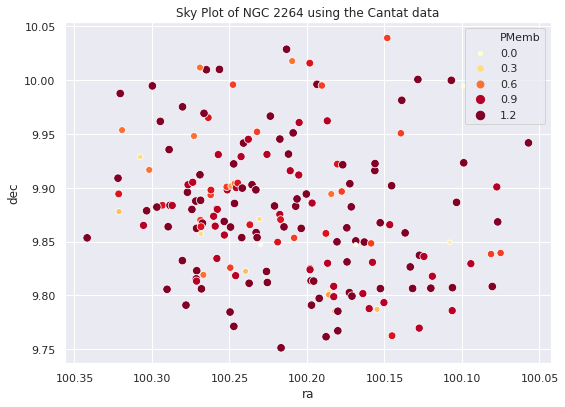

In [27]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2264 using the Cantat data')
plt.show()

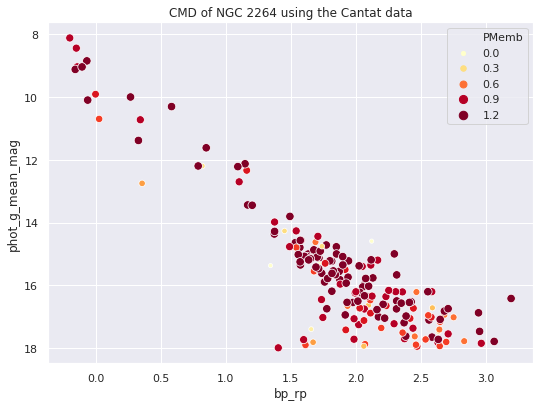

In [28]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 2264 using the Cantat data')
plt.show()

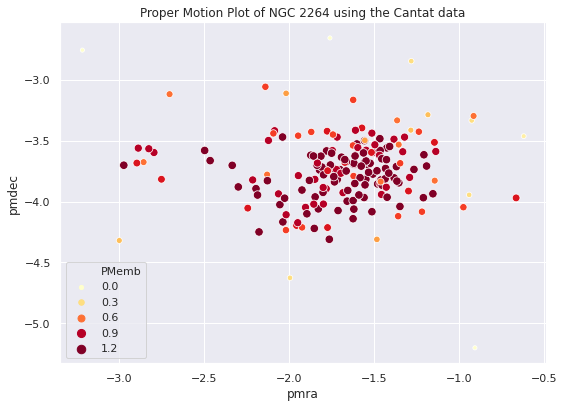

In [29]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2264 using the Cantat data')
plt.show()

In [30]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.529052
pmra                   0.163377
parallax               0.050956
parallax_over_error    0.038209
parallax_error         0.034630
dec                    0.027573
ra_error               0.025266
dec_error              0.022801
phot_g_mean_mag        0.020346
pmdec_error            0.020333
ra                     0.019135
bp_rp                  0.017027
dist_2264_center       0.015836
pmra_error             0.015461
dtype: float64

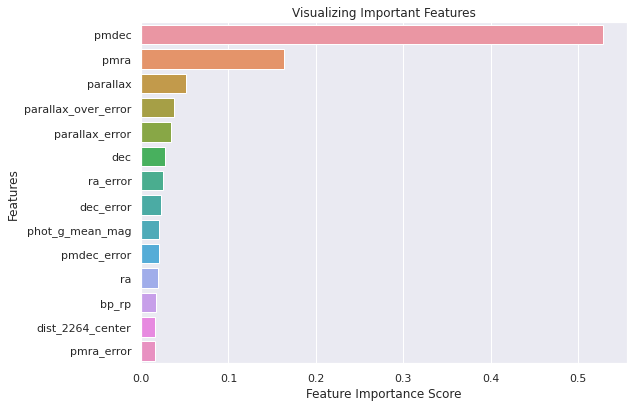

In [32]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [35]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.4886969150512719

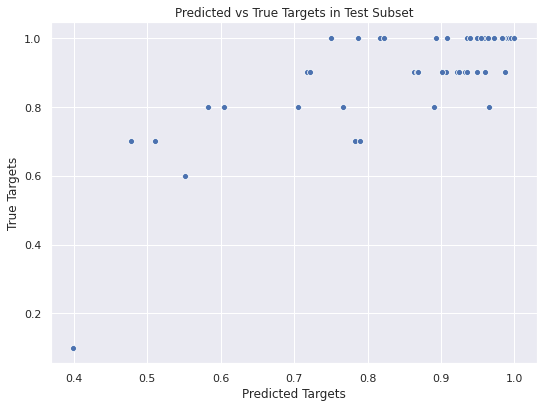

In [37]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [38]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [39]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[-0.02113142417079285, 0.13282900192015382, 0.21715390587652372, 0.3089827989817492, 0.3324579468644915, 0.42715643094329253, 0.4251252679145391, 0.4418498629796613, 0.42471575050410715, 0.4084589250435261, 0.5125362600463466, 0.48077009554485334, 0.4913490805642204, 0.47995624802381875, 0.4790399077389883, 0.5455881252388161, 0.49700732223812905, 0.3908391358817709, 0.2032748344065584]


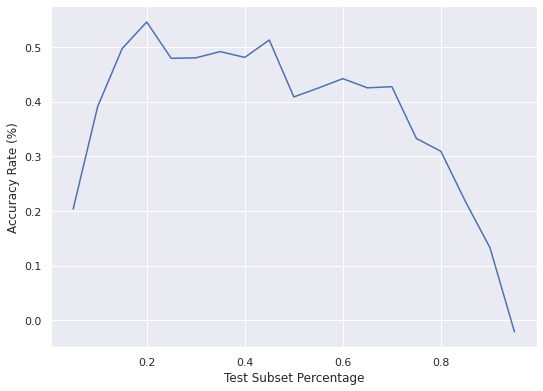

In [40]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [41]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,1.883300e+04,1.883300e+04,1.883300e+04,18833.0,18833.000000,18833.000000,18833.000000,18833.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,18833.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,14843.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,18833.000000,14769.000000,14769.000000,18833.000000,18833.000000,18833.000000,...,18065.000000,18065.000000,18833.000000,1.807400e+04,18074.000000,18074.000000,18074.000000,18063.000000,18833.000000,18063.000000,18065.000000,18074.000000,105.000000,105.000000,18833.000000,105.000000,105.000000,105.000000,18833.000000,18833.000000,18833.000000,18833.000000,2882.000000,2882.000000,2882.000000,2882.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1531.0,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,1531.000000,18833.000000
mean,1.635721e+18,3.328511e+18,8.438635e+08,2015.5,100.329659,1.457186,9.919607,1.411610,0.579658,0.447470,4.509236,-0.268250,0.805685,-2.283615,0.752101,-0.356975,0.058478,-0.183972,0.229199,-0.381442,0.106807,-0.294326,0.238203,0.108310,-0.255481,115.590878,1.486274,114.957043,0.633834,2.694080,401.157379,0.911387,15.206425,25.067860,4.616231,1.382744,0.096450,-0.154372,13.292784,9.167897,...,43.283447,19.325069,11.039133,1.641700e+04,78.814539,100.817635,17.578819,1.764667,0.088727,1.746994,0.583123,1.163931,22.542012,2.735145,0.025434,5352.380859,3.480952,-0.128571,202.953339,2.284144,100.450438,-13.145441,101048.332755,4466.820312,4257.086426,4808.442871,1.460910,1.237386,1.732094,0.730866,0.615323,0.870760,200111.0,2.220478,1.943063,2.410693,4.666847,4.012110,5.321583,0.351237
std,0.000000e+00,6.174743e+15,4.879801e+08,0.0,0.286417,3.552469,0.231877,3.327552,1.007355,0.394625,11.900553,4.205684,0.722266,5.483730,0.701668,0.347834,0.217777,0.269864,0.244164,0.201778,0.273479,0.246513,0.153846,0.139230,0.222553,32.604103,13.927749,32.430805,1.113201,10.366925,7254.111816,1.404953,469.771293,11.441879,28.627745,0.160936,0.082700,0.167138,3.605033,1.795088,...,101.520157,1.671296,4.148823,6.773574e+05,3371.761792,156.634964,1.640485,0.503254,0.373332,0.513876,0.491096,0.273460,25.881497,3.375264,0.361926,736.003418,0.545629,0.421927,0.254829,0.261782,0.291327,0.229965,4913.616933,833.371948,805.334839,836.550781,0.981803,0.942673,1.011736,0.495457,0.472254,0.514263,0.0,3.460729,3.151096,3.705523,25.391186,21.123663,29.846735,0.109382
min,1.635721e+18,3.326638e+18,3.159970e+05,2015.5,99.787789,0.020221,9.392376,0.019586,-6.363450,0.0

In [0]:
### adding their distance from the center of the clusters

## NGC 2264
center = coord.SkyCoord.from_name('NGC2264')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_2264_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [45]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1606

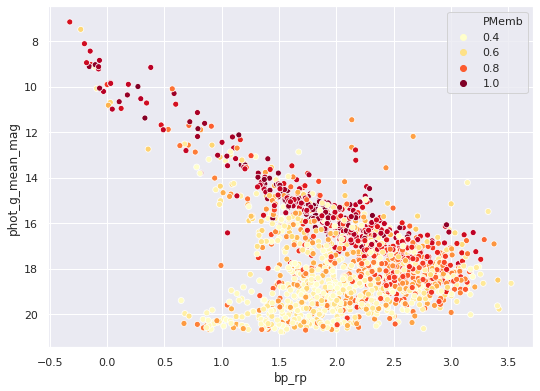

In [66]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

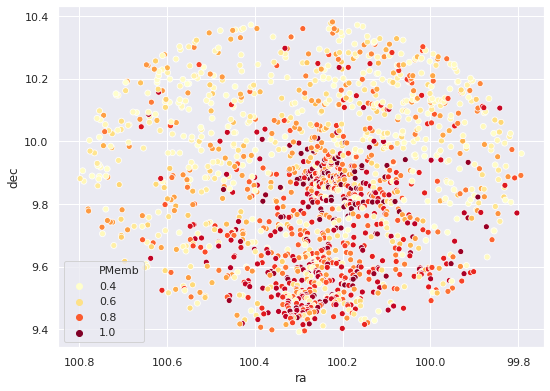

In [67]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

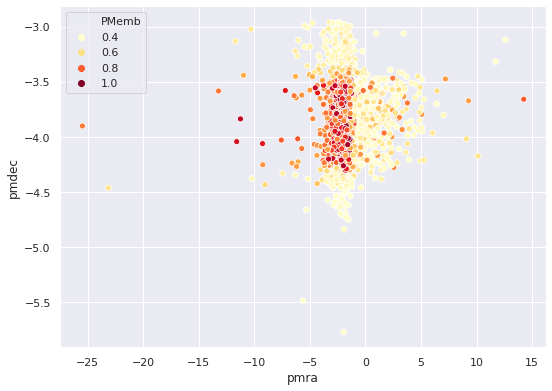

In [50]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.5] )

In [47]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.5]
len(potentialMember)

1606

In [51]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2264_center,PMemb
count,1.606000e+03,1.606000e+03,1.606000e+03,1606.0,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1.606000e+03,1606.0,1606.000000,1599.000000,1599.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1.606000e+03,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,16.000000,16.000000,1606.000000,16.000000,16.000000,16.00000,1606.000000,1606.000000,1606.000000,1606.000000,607.000000,607.000000,607.000000,607.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,1606.000000,1606.000000,1606.000000
mean,1.635721e+18,3.327688e+18,8.473471e+08,2015.5,100.258022,0.278290,9.854113,0.276844,1.032169,0.311336,10.400436,-1.483193,0.553277,-3.786310,0.506823,-0.195574,0.024571,-0.219741,0.259921,-0.365248,0.139985,-0.340823,0.252768,0.101746,-0.190292,134.558531,5.877335,133.795143,0.763387,3.646055,324.445923,0.570904,7.201960e+00,31.0,12.513985,1.346639,0.067236,-0.072174,15.424035,10.130137,...,13.452055,4.305633e+04,156.483713,140.038727,16.284901,1.667738,0.041719,2.034127,0.864754,1.169372,20.134476,5.241868,0.047323,5765.625000,3.562500,-0.09375,202.979453,2.191419,100.383035,-13.216049,100343.927512,4446.685547,4193.676270,4834.298828,1.779979,1.507653,2.033530,0.895158,0.75252,1.025179,200111.0,1.634361,1.393539,1.798040,1.934042,1.744133,2.123952,0.297236,0.299117,0.718121
std,0.000000e+00,4.566740e+15,4.864159e+08,0.0,0.207919,0.315558,0.246840,0.322399,0.779556,0.361341,11.702861,2.219880,0.643530,0.348958,0.615733,0.213700,0.197490,0.223876,0.202006,0.186050,0.231747,0.196639,0.128074,0.128740,0.212168,24.582774,28.461997,24.377631,1.267884,9.158053,2389.348633,0.764699,6.627148e+01,0.0,47.281128,0.164581,0.073080,0.114172,2.701820,1.013246,...,3.114413,3.500892e+05,1099.709052,185.558823,1.969408,0.411022,0.200008,0.621974,0.475596,0.314829,22.068486,5.010807,0.508129,771.733704,0.512348,0.37500,0.240691,0.212221,0.210965,0.246362,1047.328579,1188.824463,1074.651489,1223.656250,0.981910,0.934438,1.015565,0.497198,0.47038,0.518901,0.0,1.601528,1.410013,1.765064,8.390565,7.660282,9.131242,0.131170,0.131916,0.161373
min,1.635721e+18,3.326638e+18,5.929410e+05,2015.5,99.792263,0.021069,9.392376,0.020383,-5.427431,0.024139,-6.299778,-25.488159,0.040503,-5.769397,0.035652,-0.960296,-0.689762,-0.885211,-0.929617,-0.898820,-0.944197,-

In [52]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2264_center
count,1.860000e+02,1.860000e+02,1.860000e+02,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000,186.000000,181.000000,181.000000,181.000000,3.000000,3.000000,186.000000,3.000000,3.000000,3.0,186.000000,186.000000,186.000000,186.000000,144.000000,144.000000,144.000000,144.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,186.000000,186.000000,186.000000
mean,1.635721e+18,3.326784e+18,8.280865e+08,2015.5,100.213468,0.072569,9.878067,0.071833,1.351573,0.082092,21.600460,-1.713496,0.141594,-3.743843,0.125631,-0.124861,-0.013726,-0.229716,0.284783,-0.384964,0.183260,-0.358689,0.201911,0.089182,-0.101047,152.795699,16.935484,151.849462,0.946237,4.115653,297.708801,0.212232,4.696803,31.0,28.146078,1.399801,0.018506,-0.034812,17.408602,10.634409,...,15.182796,1.233644e+05,344.702351,186.840729,14.525523,1.473558,0.129032,1.860670,0.859732,1.000938,17.663946,6.709235,0.102151,5833.333496,3.833333,0.0,202.938125,2.163288,100.336265,-13.195483,100556.638889,4531.785645,4245.856934,4903.776855,1.747458,1.442371,1.986919,0.877488,0.713944,1.003771,200111.0,1.408721,1.217725,1.548704,1.195101,1.119065,1.271138,0.104799,0.862366,0.105851
std,0.000000e+00,8.928187e+13,5.066211e+08,0.0,0.061261,0.039365,0.063839,0.039039,0.098563,0.044521,10.954170,0.445249,0.075890,0.300878,0.066840,0.170140,0.137864,0.135644,0.134800,0.126800,0.131831,0.117655,0.115029,0.110401,0.184023,17.309931,47.414402,17.351655,1.487720,8.044185,624.008545,0.227853,18.451157,0.0,72.081253,0.133535,0.009988,0.079043,1.949284,0.678392,...,3.662657,4.757823e+05,939.250760,185.163849,1.783509,0.223517,0.408711,0.683421,0.381192,0.347672,6.235787,4.756371,0.808934,288.675140,0.577350,0.0,0.057887,0.066118,0.061034,0.064705,898.928007,1413.615601,1237.765991,1462.936523,0.987902,0.909715,1.042373,0.494933,0.455351,0.527763,0.0,0.618332,0.618088,0.611171,3.740212,3.529193,3.951503,0.057036,0.208165,0.057735
min,1.635721e+18,3.326712e+18,5.929410e+05,2015.5,100.057096,0.023724,9.751314,0.022577,1.092609,0.026016,6.027352,-3.389699,0.045983,-5.199818,0.041781,-0.960296,-0.685270,-0.885211,-0.377267,-0.702543,-0.271878,-0.933394,-0.694126,-0.667703,-0.896725,105.000000,0.000000,101.000000,0.000000,-6.49713

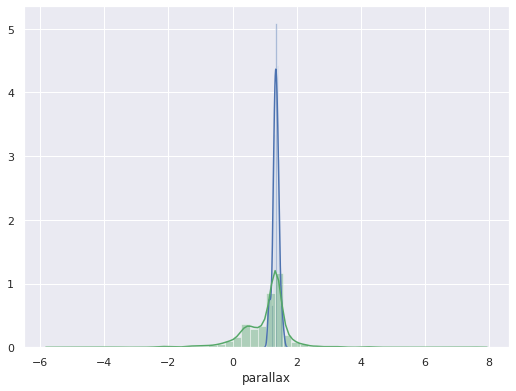

In [53]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_2264_membership_prob.csv')
potentialMember.to_csv('NGC_2264_membership_prob.csv')

### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [56]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2264_center,PMemb,dataset
3,1635721458409799680,b'Gaia DR2 3326740006577519360',3326740006577519360,338009198,2015.5,100.293254,0.051974,9.883825,0.053140,1.166296,0.061081,19.094145,-1.772968,0.099508,-4.213214,0.093444,-0.301653,0.106379,-0.293946,0.308379,-0.403827,0.127463,-0.435419,0.316915,0.172105,-0.249948,156,156,154,2,17.077967,679.161133,0.137515,5.479145,31,False,37.789845,1.775599,0.013533,-0.130383,...,9.912222,1.151723,0,-0.000747,0.006741,-0.007487,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.968913,2.235852,100.416360,-13.184037,100001.0,9670.666992,9200.25,9831.000000,0.3173,0.1884,0.4576,0.1583,0.0864,0.2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.008433,0.008440,0.841,New_member
4,1635721458409799680,b'Gaia DR2 3326740448959197952',3326740448959197952,1373752151,2015.5,100.286039,0.352156,9.896279,0.341450,1.204464,0.371100,3.245658,-2.783927,0.712035,-4.109259,0.664206,-0.221666,0.088138,-0.312325,0.239311,-0.333800,0.167616,-0.418108,0.136582,0.099756,-0.171489,160,0,160,0,2.448684,201.439468,0.882221,1.074709,31,False,0.134607,1.364199,0.088596,-0.099713,...,17.825830,2.180836,0,2.250570,0.690392,1.560179,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.954576,2.235211,100.408145,-13.172134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.009112,0.009214,0.804,New_member
5,1635721458409799680,b'Gaia DR2 3326740075296996608',3326740075296996608,669586837,2015.5,100.288331,0.080591,9.883731,0.081428,1.456877,0.078880,18.469517,-1.381548,0.147312,-3.806088,0.139559,-0.523801,0.102808,-0.408580,0.511314,-0.306236,0.384220,-0.553562,0.249792,0.076708,-0.439862,157,0,155,2,3.298759,213.852173,0.288888,3.174382,31,False,3.599010,1.383417,0.018468,-0.147385,...,15.368563,1.446566,0,2.314808,1.189182,1.125626,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.966781,2.231493,100.411398,-13.184484,100001.0,3608.004883,3417.00,4477.879883,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,1.125405,0.730631,1.254738,0.193366,0.171433,0.215299,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.010309,0.010361,0.970,New_member
6,1635721458409799680,b'Gaia DR2 3326740002281694592',3326740002281694592,535645129,2015.5,100.296823,0.050816,9.882133,0.050554,1.347839,0.056103,24.024263,-1.478468,0.096108,-3.855786,0.091301,-0.356103,0.201527,-0.289602,0.273360,-0.386346,0.137331,-0.413178,0.230126,0.124278,-0.257241,161,161,159,2,16.836754,676.967285,0.141880,6.011601,31,False,36.901455,1.779420,0.013208,-0.156618,...,10.136516,1.153538,1,-0.060998,-0.016715,-0.044283,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',202.972026,2.238207,100.420088,-13.185468,100002.0,8748.333008,7420.00,9705.000000,0.0870,0.0379,0.2241,0.0435,0.0146,0.11

In [57]:
concatenated.dataset.value_counts()

New_member    1606
Old_member     173
Name: dataset, dtype: int64

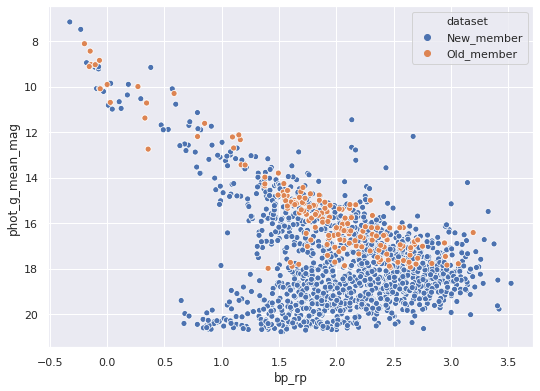

In [58]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

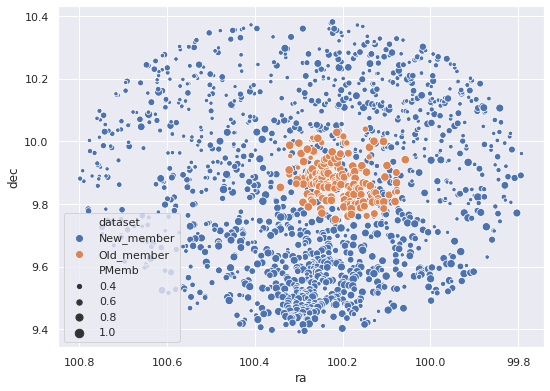

In [59]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

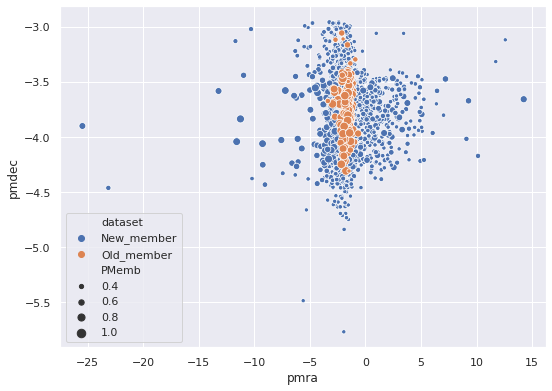

In [60]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(60)

files.download('NGC_2264_cantat.csv')
files.download('NGC_2264_membership_prob.csv')